In [1446]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from category_encoders import TargetEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import plotly.express as px
from collections import Counter
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm, skew
from scipy import stats
from scipy.special import boxcox1p
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from scipy.special import boxcox1p
from datetime import datetime
from collections import Counter
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
%matplotlib inline

In [1447]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
(train.shape, test.shape)

((50042, 14), (3064, 13))

In [1448]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Height,Weight
0,19845.0,1.0,1.0,"Laws, Frederick",male,NaN,0.0,0.0,526036,26.328807,C11708,C,164.112952,70.375758
1,23586.0,0.0,2.0,"Lee, Nancy",female,56.0,0.0,0.0,SC/AH 12284,5.640174,NaN,S,172.054127,59.997679
2,37036.0,0.0,3.0,"Hamler, Kendall",male,52.0,NaN,0.0,43522,8.666601,NaN,S,174.511733,72.934679
3,47438.0,1.0,3.0,"Newby, Lillian",female,27.0,0.0,0.0,NaN,6.568114,F2378,S,192.132239,67.580410
4,8963.0,0.0,3.0,"Barnard, Gerardo",male,24.0,0.0,0.0,14927,12.268054,NaN,S,167.715275,73.319140


In [1449]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Height,Weight
0,1,1,"Bull, Wayne",male,51.0,0,0,205661,30.87,C8025,S,174.967142,77.579055
1,2,1,"Melton, Christine",female,61.0,1,1,189184,54.99,A4027,S,168.617357,70.491031
2,3,1,"Katayama, Eric",male,47.0,0,0,301476,30.96,C12992,C,176.476885,69.679459
3,4,1,"Lopes, Diana",female,60.0,0,0,PC 29058,229.34,C9467,C,185.230299,74.758954
4,5,2,"Rhyne, Cindy",female,31.0,0,2,292412,138.60,G16861,S,167.658466,77.664156


In [1450]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        sum_mean = df[col].isnull().mean()
        l.append([col,dtypes,nunique,sum_null,sum_mean])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null','sum_mean']
    return df_check 

check(train)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000040
1,Survived,float64,2,2,0.000040
2,Pclass,float64,3,4835,0.096619
3,Name,object,46533,1102,0.022022
4,Sex,object,2,3334,0.066624
5,Age,float64,169,1668,0.033332
6,SibSp,float64,7,6784,0.135566
7,Parch,float64,8,2000,0.039966
8,Ticket,object,41282,2344,0.046841
9,Fare,float64,49907,85,0.001699


<AxesSubplot:>

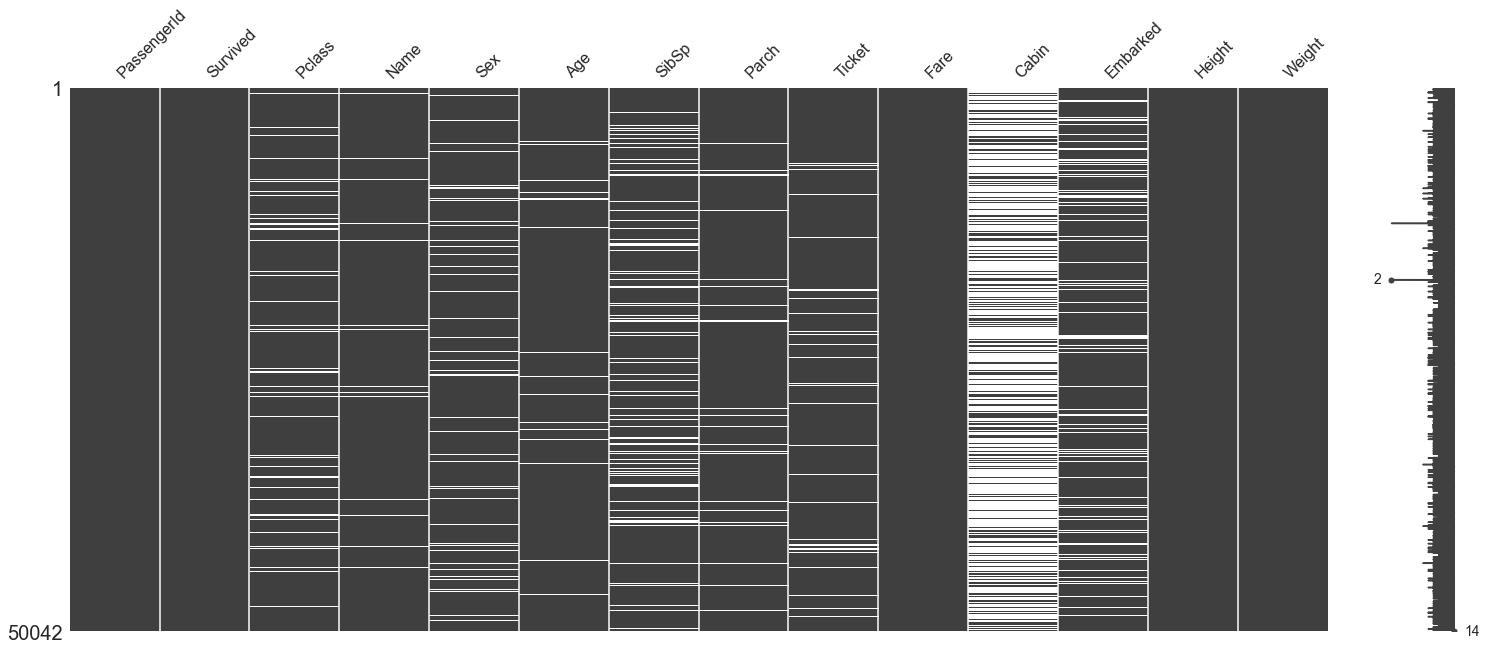

In [1451]:
msno.matrix(train)

<AxesSubplot:>

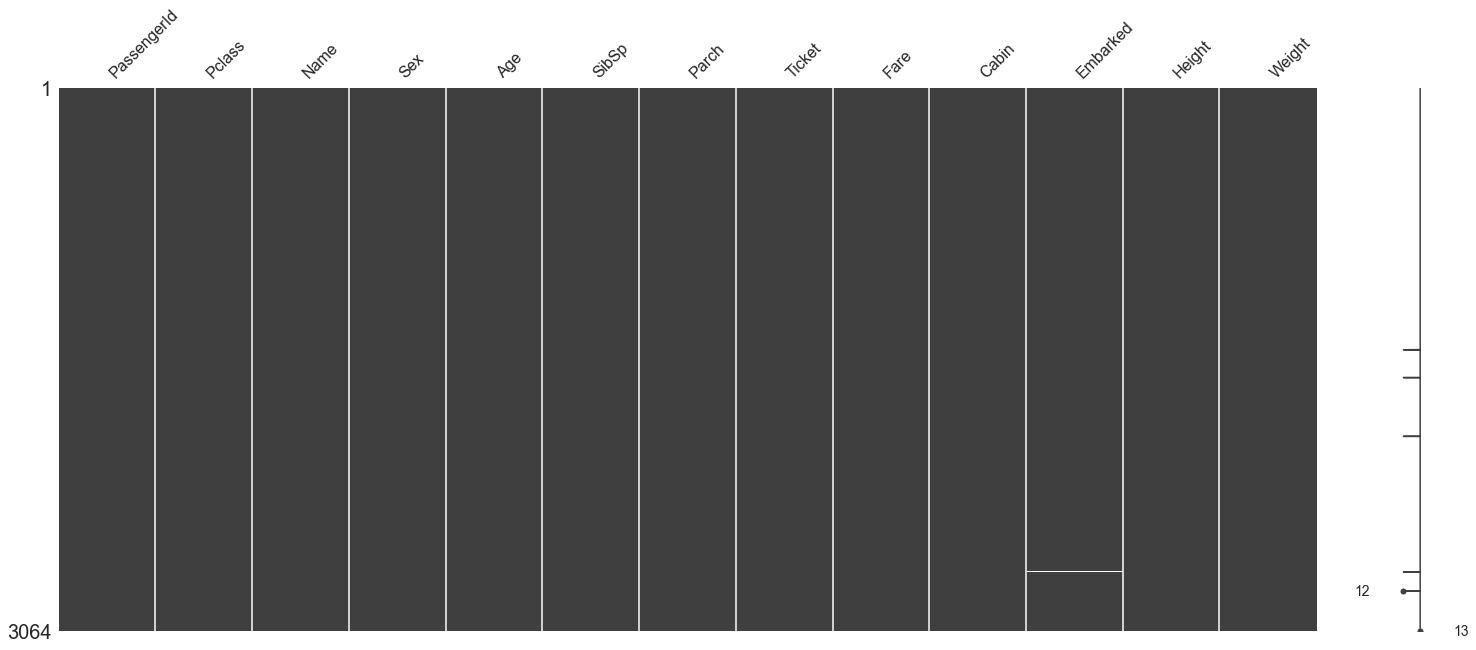

In [1452]:
msno.matrix(test) 

In [1453]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Height,Weight
0,19845.0,1.0,1.0,"Laws, Frederick",male,NaN,0.0,0.0,526036,26.328807,C11708,C,164.112952,70.375758
1,23586.0,0.0,2.0,"Lee, Nancy",female,56.0,0.0,0.0,SC/AH 12284,5.640174,NaN,S,172.054127,59.997679
2,37036.0,0.0,3.0,"Hamler, Kendall",male,52.0,NaN,0.0,43522,8.666601,NaN,S,174.511733,72.934679
3,47438.0,1.0,3.0,"Newby, Lillian",female,27.0,0.0,0.0,NaN,6.568114,F2378,S,192.132239,67.580410
4,8963.0,0.0,3.0,"Barnard, Gerardo",male,24.0,0.0,0.0,14927,12.268054,NaN,S,167.715275,73.319140


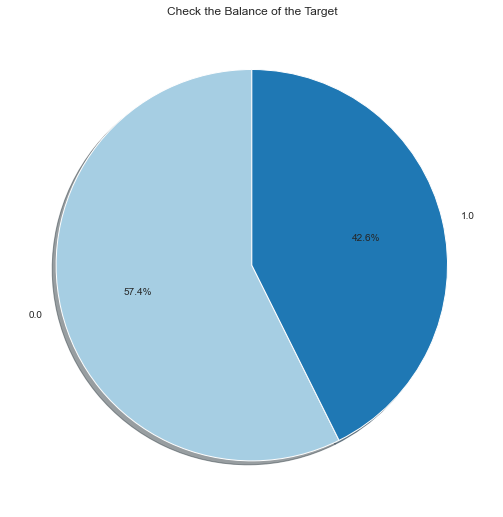

In [1454]:
pt = train['Survived'].value_counts()
labels=pt.index
sizes=pt.values
plt.figure(figsize=(12,9))
colors = sns.color_palette('Paired')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.title('Check the Balance of the Target')
plt.show()

# EDA

Age

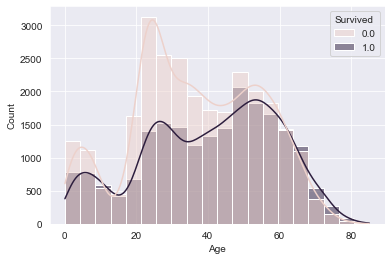

In [1455]:
sns.histplot(data= train, x = 'Age', hue='Survived', bins= 20, kde=True)
plt.show()

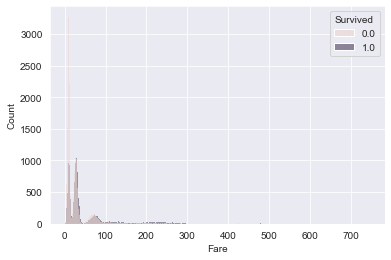

In [1456]:
sns.histplot(data= train, x = 'Fare', hue='Survived')
plt.show()

In [1457]:
check(train)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000040
1,Survived,float64,2,2,0.000040
2,Pclass,float64,3,4835,0.096619
3,Name,object,46533,1102,0.022022
4,Sex,object,2,3334,0.066624
5,Age,float64,169,1668,0.033332
6,SibSp,float64,7,6784,0.135566
7,Parch,float64,8,2000,0.039966
8,Ticket,object,41282,2344,0.046841
9,Fare,float64,49907,85,0.001699


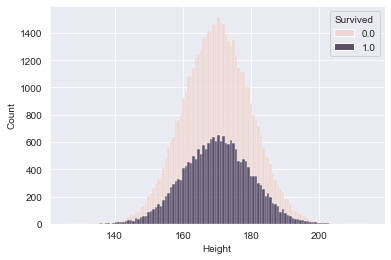

In [1458]:
sns.histplot(data= train, x = 'Height', hue='Survived', multiple='stack')
plt.show()

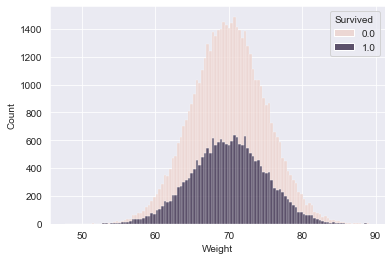

In [1459]:
sns.histplot(data= train, x = 'Weight', hue='Survived', multiple='stack')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

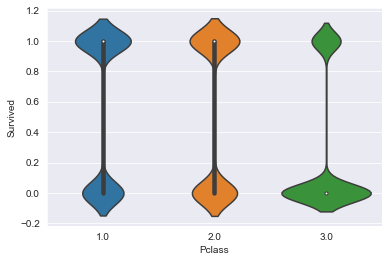

In [1460]:
sns.violinplot(x = 'Pclass', y = 'Survived', data = train)

# Featrue Engineering and Preprocessing

In [1461]:
df = pd.concat([train, test])
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,4835,0.091044
3,Name,object,49371,1102,0.020751
4,Sex,object,2,3334,0.062780
5,Age,float64,170,1668,0.031409
6,SibSp,float64,7,6784,0.127745
7,Parch,float64,8,2000,0.037661
8,Ticket,object,43705,2344,0.044138
9,Fare,float64,52517,85,0.001601


# Age filling

In [1462]:
df[['Pclass', 'Age']].isnull().sum()

Pclass    4835
Age       1668
dtype: int64

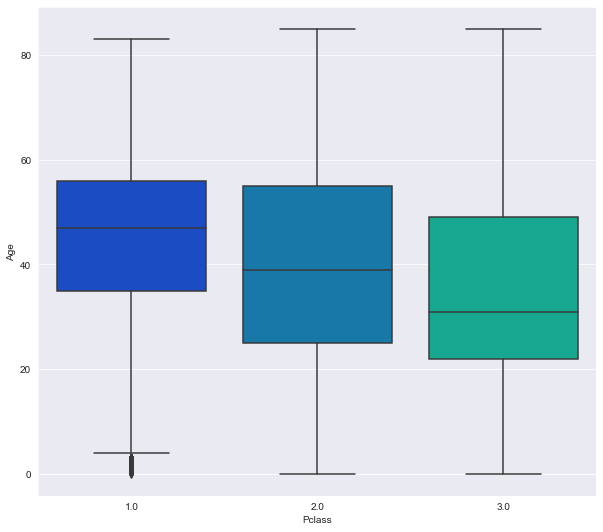

In [1463]:
plt.figure(figsize=(10,9))
sns.boxplot(x= 'Pclass', y= 'Age', data= df, palette='winter')
plt.show()

In [1464]:
def age_impute(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 47
        
        elif Pclass == 2:
            return 38
        
        else: 
            return 30
        
    else: 
        return Age

In [1465]:
mean_fare = df['Age'].mean()
std_fare  = df["Age"].std()
fare_randoms = np.random.uniform(mean_fare - std_fare, mean_fare + std_fare, size =  df["Age"].isnull().sum())
df.loc[df['Age'].isnull(), 'Age'] = fare_randoms
print(f'mean {mean_fare}, std = {std_fare}')

mean 38.81407714141298, std = 18.18858194500939


In [1466]:
#df['Age'] = df[['Age', 'Pclass']].apply(age_impute, axis = 1)

In [1467]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,4835,0.091044
3,Name,object,49371,1102,0.020751
4,Sex,object,2,3334,0.062780
5,Age,float64,1838,0,0.000000
6,SibSp,float64,7,6784,0.127745
7,Parch,float64,8,2000,0.037661
8,Ticket,object,43705,2344,0.044138
9,Fare,float64,52517,85,0.001601


# Cabin filling

In [1468]:
df['Cabin'].value_counts()

C19828    6
C9767     5
A9127     5
B20224    4
B4751     4
         ..
D4216     1
D17817    1
F10666    1
D6254     1
C6926     1
Name: Cabin, Length: 17148, dtype: int64

In [1469]:
df['Cabin'].isnull().sum()

33985

In [1470]:
df['Desk'] = pd.Series([Cabin_Letter[0] if not pd.isnull(Cabin_Letter) else 'X' for Cabin_Letter in df['Cabin']])

In [1471]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,4835,0.091044
3,Name,object,49371,1102,0.020751
4,Sex,object,2,3334,0.062780
5,Age,float64,1838,0,0.000000
6,SibSp,float64,7,6784,0.127745
7,Parch,float64,8,2000,0.037661
8,Ticket,object,43705,2344,0.044138
9,Fare,float64,52517,85,0.001601


In [1472]:
df.drop(columns='Cabin', inplace = True)

In [1473]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,4835,0.091044
3,Name,object,49371,1102,0.020751
4,Sex,object,2,3334,0.062780
5,Age,float64,1838,0,0.000000
6,SibSp,float64,7,6784,0.127745
7,Parch,float64,8,2000,0.037661
8,Ticket,object,43705,2344,0.044138
9,Fare,float64,52517,85,0.001601


# Pclass impute

In [1474]:
def Pclass_Impute(cols):
    Age = cols[0]
    Pclass= cols[1]
    if pd.isnull(Pclass):
        
        if Age < 30:
            return 1.0
        
        elif Age >= 30  and Age <= 47:
            return 2.0
        
        else: 
            return 3.0
        
    else:
        return Pclass

In [1475]:
df['Pclass'] = df[['Age', 'Pclass']].apply(Pclass_Impute, axis = 1)

In [1476]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Name,object,49371,1102,0.020751
4,Sex,object,2,3334,0.062780
5,Age,float64,1838,0,0.000000
6,SibSp,float64,7,6784,0.127745
7,Parch,float64,8,2000,0.037661
8,Ticket,object,43705,2344,0.044138
9,Fare,float64,52517,85,0.001601


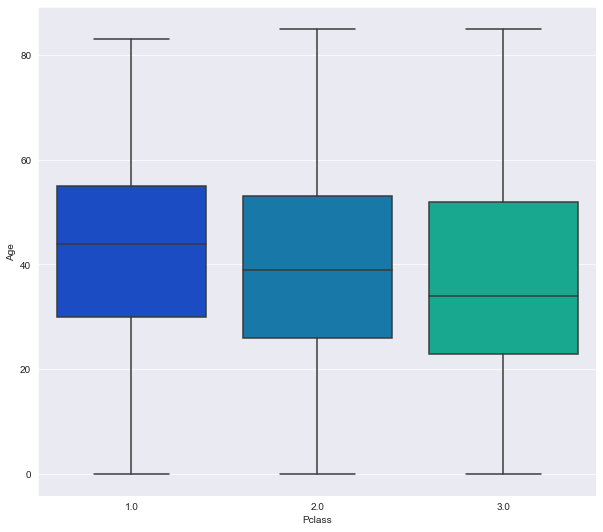

In [1477]:
plt.figure(figsize=(10,9))
sns.boxplot(x= 'Pclass', y= 'Age', data= df, palette='winter')
plt.show()

In [1478]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Name,object,49371,1102,0.020751
4,Sex,object,2,3334,0.062780
5,Age,float64,1838,0,0.000000
6,SibSp,float64,7,6784,0.127745
7,Parch,float64,8,2000,0.037661
8,Ticket,object,43705,2344,0.044138
9,Fare,float64,52517,85,0.001601


# Fare Filling

In [1479]:
mean_fare = df['Fare'].mean()
std_fare  = df["Fare"].std()
fare_randoms = np.random.uniform(mean_fare - std_fare, mean_fare + std_fare, size =  df["Fare"].isnull().sum())
df.loc[df['Fare'].isnull(), 'Fare'] = fare_randoms
print(f'mean {mean_fare}, std = {std_fare}')

mean 46.71351919960191, std = 72.75043751766117


In [1480]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Name,object,49371,1102,0.020751
4,Sex,object,2,3334,0.062780
5,Age,float64,1838,0,0.000000
6,SibSp,float64,7,6784,0.127745
7,Parch,float64,8,2000,0.037661
8,Ticket,object,43705,2344,0.044138
9,Fare,float64,52602,0,0.000000


In [1481]:
df['Parch'].value_counts()

0.0    37443
1.0     6602
2.0     5897
3.0      537
4.0      219
5.0      182
9.0      127
6.0       99
Name: Parch, dtype: int64

In [1482]:
df['SibSp'].value_counts()

0.0    33687
1.0     9362
2.0     1770
3.0      778
4.0      505
8.0      156
5.0       64
Name: SibSp, dtype: int64

In [1483]:
df['Name'].value_counts()

Johnson, John      20
Smith, John        14
Smith, James       12
Williams, David    10
Smith, William     10
                   ..
Dinkins, Ethan      1
Terrell, Esther     1
Lewis, Marilyn      1
Haag, Patricia      1
Byers, Rosa         1
Name: Name, Length: 49371, dtype: int64

In [1484]:
df.drop(columns= 'Name', axis = 1, inplace = True)

In [1485]:
df.drop(columns= 'Ticket', axis = 1, inplace = True)

In [1486]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Sex,object,2,3334,0.062780
4,Age,float64,1838,0,0.000000
5,SibSp,float64,7,6784,0.127745
6,Parch,float64,8,2000,0.037661
7,Fare,float64,52602,0,0.000000
8,Embarked,object,3,6119,0.115222
9,Height,float64,53052,2,0.000038


In [1487]:
df['Embarked'].value_counts()

S    33259
C    10926
Q     2802
Name: Embarked, dtype: int64

<AxesSubplot:>

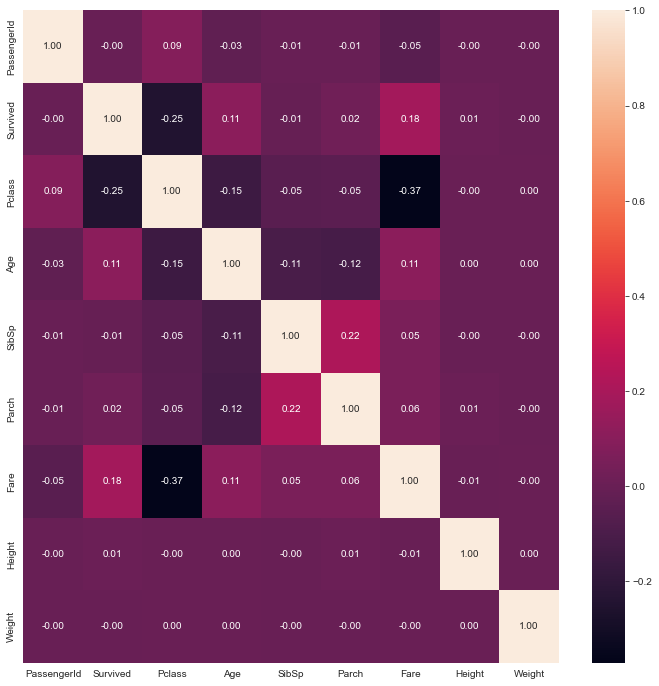

In [1488]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot= True, fmt= '0.2f')

In [1489]:
df['SibSp'].where(df['Parch'] == 6).value_counts()

0.0    68
1.0    17
4.0     2
2.0     2
3.0     1
Name: SibSp, dtype: int64

In [1490]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Sex,object,2,3334,0.062780
4,Age,float64,1838,0,0.000000
5,SibSp,float64,7,6784,0.127745
6,Parch,float64,8,2000,0.037661
7,Fare,float64,52602,0,0.000000
8,Embarked,object,3,6119,0.115222
9,Height,float64,53052,2,0.000038


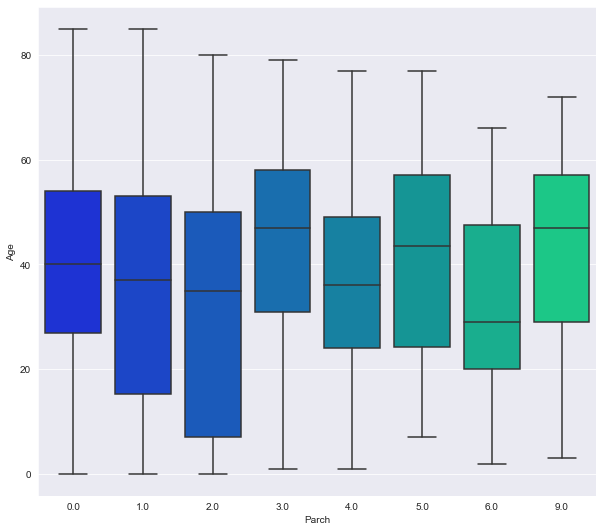

In [1491]:
plt.figure(figsize=(10,9))
sns.boxplot(x= 'Parch', y= 'Age', data= df, palette='winter')
plt.show()

In [1492]:
df['SibSp'].mode()[0]

0.0

In [1493]:
df['SibSp'].fillna(df['SibSp'].mode()[0], inplace = True)

In [1494]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Sex,object,2,3334,0.062780
4,Age,float64,1838,0,0.000000
5,SibSp,float64,7,0,0.000000
6,Parch,float64,8,2000,0.037661
7,Fare,float64,52602,0,0.000000
8,Embarked,object,3,6119,0.115222
9,Height,float64,53052,2,0.000038


In [1495]:
df['Sex'].where(df['Survived'] == 0)

0          NaN
1       female
2         male
3          NaN
4         male
         ...  
3059       NaN
3060       NaN
3061       NaN
3062       NaN
3063       NaN
Name: Sex, Length: 53106, dtype: object

In [1496]:
def gender_impute(col):
    sex = col[0]
    survived = col[1]
    
    if pd.isnull(sex):
        
        if survived == 0:
            return 'male'
        
        else:
            return 'female'
        
        
    else:
        return sex

In [1497]:
df['Sex'] = df[['Sex', 'Survived']].apply(gender_impute, axis = 1)

In [1498]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Sex,object,2,0,0.000000
4,Age,float64,1838,0,0.000000
5,SibSp,float64,7,0,0.000000
6,Parch,float64,8,2000,0.037661
7,Fare,float64,52602,0,0.000000
8,Embarked,object,3,6119,0.115222
9,Height,float64,53052,2,0.000038


In [1499]:
df['Embarked'].value_counts()

S    33259
C    10926
Q     2802
Name: Embarked, dtype: int64

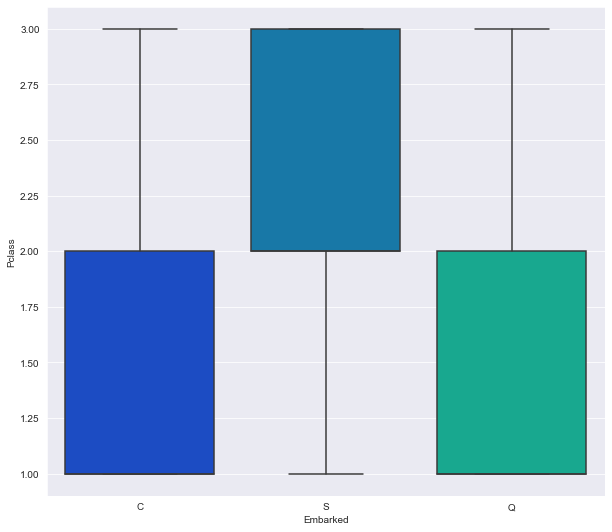

In [1500]:
plt.figure(figsize=(10,9))
sns.boxplot(x= 'Embarked', y= 'Pclass', data= df, palette='winter')
plt.show()

In [1501]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Sex,object,2,0,0.000000
4,Age,float64,1838,0,0.000000
5,SibSp,float64,7,0,0.000000
6,Parch,float64,8,2000,0.037661
7,Fare,float64,52602,0,0.000000
8,Embarked,object,3,6119,0.115222
9,Height,float64,53052,2,0.000038


In [1502]:
def Embarked_Impute(cols):
    Pclass = cols[0]
    Embarked= cols[1]
    if pd.isnull(Embarked):
        
        if Pclass == 1:
            return 'C'
        
        elif Pclass == 2:
            return 'S'
        
        else: 
            return 'Q'
        
    else:
        return Embarked

In [1503]:
df['Embarked'] = df[['Pclass', 'Embarked']].apply(Embarked_Impute, axis = 1)

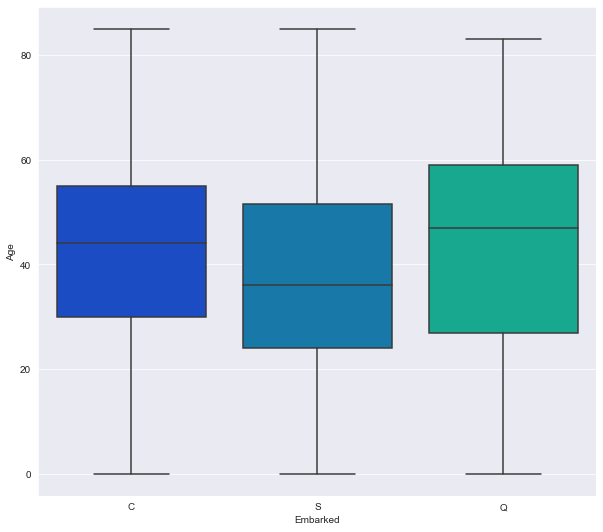

In [1504]:
plt.figure(figsize=(10,9))
sns.boxplot(x= 'Embarked', y= 'Age', data= df, palette='winter')
plt.show()

In [1505]:
df['Embarked'].where(df['Pclass'] == 1).value_counts()

S    8157
C    7857
Q    1893
Name: Embarked, dtype: int64

In [1506]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Sex,object,2,0,0.000000
4,Age,float64,1838,0,0.000000
5,SibSp,float64,7,0,0.000000
6,Parch,float64,8,2000,0.037661
7,Fare,float64,52602,0,0.000000
8,Embarked,object,3,0,0.000000
9,Height,float64,53052,2,0.000038


In [1507]:
df['Desk'].value_counts()

X    36043
C     6407
B     3865
A     3346
D     1874
E      912
F      371
G      270
T       18
Name: Desk, dtype: int64

In [1508]:
df['Parch'].where(df['Desk'] == 'A').value_counts()

0.0    1882
2.0     824
1.0     384
3.0      86
4.0      24
5.0      16
6.0       9
9.0       4
Name: Parch, dtype: int64

In [1509]:
df['Parch'].mode()[0]

0.0

In [1510]:
df['Parch'] = df['Parch'].fillna(df['Parch'].mode()[0])

In [1511]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Sex,object,2,0,0.000000
4,Age,float64,1838,0,0.000000
5,SibSp,float64,7,0,0.000000
6,Parch,float64,8,0,0.000000
7,Fare,float64,52602,0,0.000000
8,Embarked,object,3,0,0.000000
9,Height,float64,53052,2,0.000038


In [1512]:
df['Fare'].max()

744.7028418

In [1513]:
numerical_cols = ['Age', 'Fare', 'Height', 'Weight']

In [1514]:
df[numerical_cols] = preprocessing.scale(df[numerical_cols])

In [1515]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Sex,object,2,0,0.000000
4,Age,float64,1838,0,0.000000
5,SibSp,float64,7,0,0.000000
6,Parch,float64,8,0,0.000000
7,Fare,float64,52602,0,0.000000
8,Embarked,object,3,0,0.000000
9,Height,float64,53052,2,0.000038


In [1516]:
df['Sex'].value_counts()

male      29491
female    23615
Name: Sex, dtype: int64

In [1517]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [1518]:
encodoer = TargetEncoder(cols=['Desk', 'Embarked'])
df = encodoer.fit_transform(df, df['Survived'])

<AxesSubplot:>

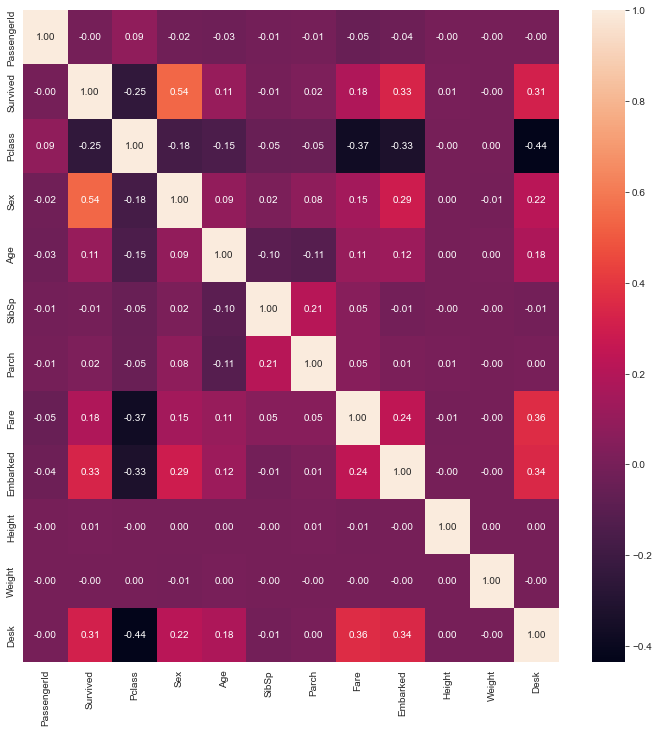

In [1519]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot= True, fmt= '0.2f')

# feature selection

In [1520]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Sex,int64,2,0,0.000000
4,Age,float64,1838,0,0.000000
5,SibSp,float64,7,0,0.000000
6,Parch,float64,8,0,0.000000
7,Fare,float64,52602,0,0.000000
8,Embarked,float64,3,0,0.000000
9,Height,float64,53052,2,0.000038


In [1521]:
df_train = df[:train.shape[0]]
df_test = df[train.shape[0]:]
(df_train.shape, df_test.shape)

((50042, 12), (3064, 12))

In [1534]:
df_train = df_train[:10000]

In [1535]:
df_train.drop_duplicates(inplace = True)

In [ ]:
df_train.dropna(inplace=True)

In [1537]:
X = df_train.drop(columns='Survived', axis = 1)
y = df_train[['Survived']]

In [1538]:
method = VarianceThreshold(threshold=0.2)
method.fit(X)
selected_mask = method.get_support()
selected_features = X.columns[selected_mask].tolist()
selected_mask

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False])

In [1529]:
combined_importance /= np.max(combined_importance)
feature_names = X.columns # Replace with your actual feature names
for feature, importance in zip(feature_names, combined_importance):
    print(f"{feature}: {importance}")

Pclass: 0.5340997664272491
Sex: 1.0
Age: 0.7829420606233298
SibSp: 0.33594237392651877
Parch: 0.4802813741684373
Fare: 0.9869418305779837
Embarked: 0.32502214990716194
Height: 0.9310036313686323
Weight: 0.8205331071177224
Desk: 0.3628425552311359


In [1530]:
second_approch = dict(zip(feature_names, combined_importance))
sorted(second_approch.items(), key=lambda x:x[1], reverse=True)

[('Sex', 1.0),
 ('Fare', 0.9869418305779837),
 ('Height', 0.9310036313686323),
 ('Weight', 0.8205331071177224),
 ('Age', 0.7829420606233298),
 ('Pclass', 0.5340997664272491),
 ('Parch', 0.4802813741684373),
 ('Desk', 0.3628425552311359),
 ('SibSp', 0.33594237392651877),
 ('Embarked', 0.32502214990716194)]

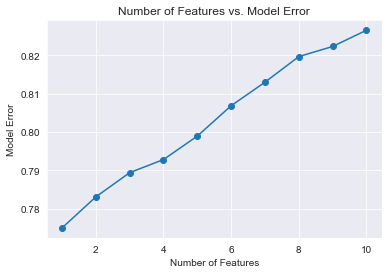

In [1533]:
plt.plot(feature_counts, errors, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Model Error')
plt.title('Number of Features vs. Model Error')
plt.show()

In [1355]:
check(df)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,float64,49989,2,0.000038
1,Survived,float64,2,3066,0.057734
2,Pclass,float64,3,0,0.000000
3,Sex,int64,2,0,0.000000
4,Age,float64,1838,0,0.000000
5,SibSp,float64,7,0,0.000000
6,Parch,float64,8,0,0.000000
7,Fare,float64,52602,0,0.000000
8,Embarked,float64,3,0,0.000000
9,Height,float64,53052,2,0.000038


In [1356]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Height,Weight,Desk
0,1.0,0,0.332232,0.0,0.0,-0.280232,0.720504,-0.590142,0.072359,0.708798
1,2.0,1,0.954892,0.0,0.0,-0.564764,0.325023,0.204560,-2.000306,0.342848
2,3.0,0,0.732661,0.0,0.0,-0.523142,0.325023,0.450501,0.583415,0.342848
3,3.0,1,-0.656286,0.0,0.0,-0.552002,0.325023,2.213848,-0.485916,0.824926
4,3.0,0,-0.822960,0.0,0.0,-0.473611,0.325023,-0.229645,0.660198,0.342848
...,...,...,...,...,...,...,...,...,...,...
50037,3.0,0,-0.711844,0.0,0.0,-0.529678,0.426468,0.766016,-0.459505,0.342848
50038,2.0,1,1.954934,0.0,1.0,-0.217145,0.325023,-0.406983,-0.648623,0.342848
50039,1.0,1,-1.878560,0.0,0.0,0.325335,0.720504,-1.337331,0.343085,0.708798
50040,3.0,0,-1.045192,0.0,0.0,-0.505368,0.325023,-0.270371,-0.864636,0.342848


In [1357]:
X.duplicated().sum()

0

In [1358]:
X.drop_duplicates(inplace = True)

In [1359]:
selected_features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Height', 'Weight']

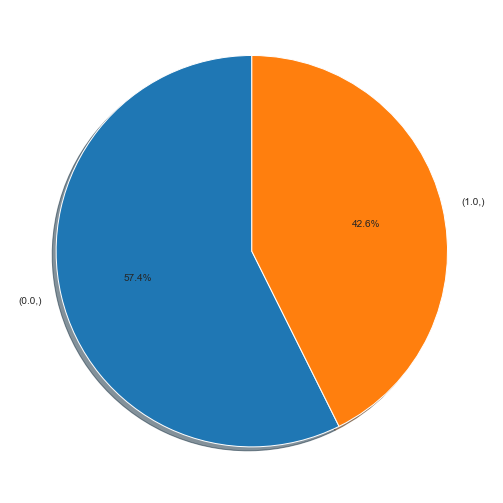

In [1360]:
pt = y.value_counts()
labels=pt.index
sizes=pt.values
plt.figure(figsize=(12,9))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,startangle=90)
plt.show()

In [1361]:
check(X)

,column,dtypes,nunique,sum_null,sum_mean
0,Pclass,float64,3,0,0.0
1,Sex,int64,2,0,0.0
2,Age,float64,1835,0,0.0
3,SibSp,float64,7,0,0.0
4,Parch,float64,8,0,0.0
5,Fare,float64,49988,0,0.0
6,Embarked,float64,3,0,0.0
7,Height,float64,49986,0,0.0
8,Weight,float64,49986,0,0.0
9,Desk,float64,9,0,0.0


In [1362]:
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[('Survived', 1)] (57340, 1)


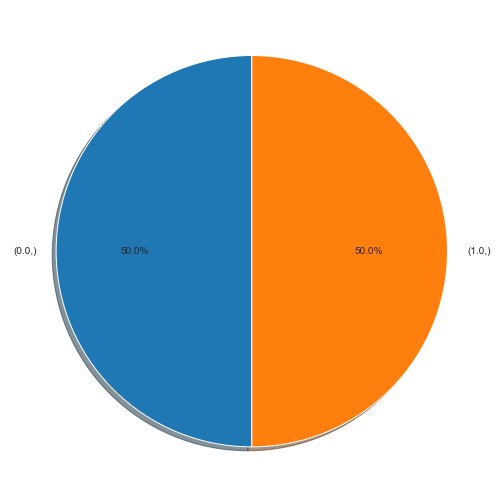

In [1363]:
pt = y_resampled.value_counts()
labels=pt.index
sizes=pt.values
plt.figure(figsize=(12,9))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,startangle=90)
plt.show()

<AxesSubplot:>

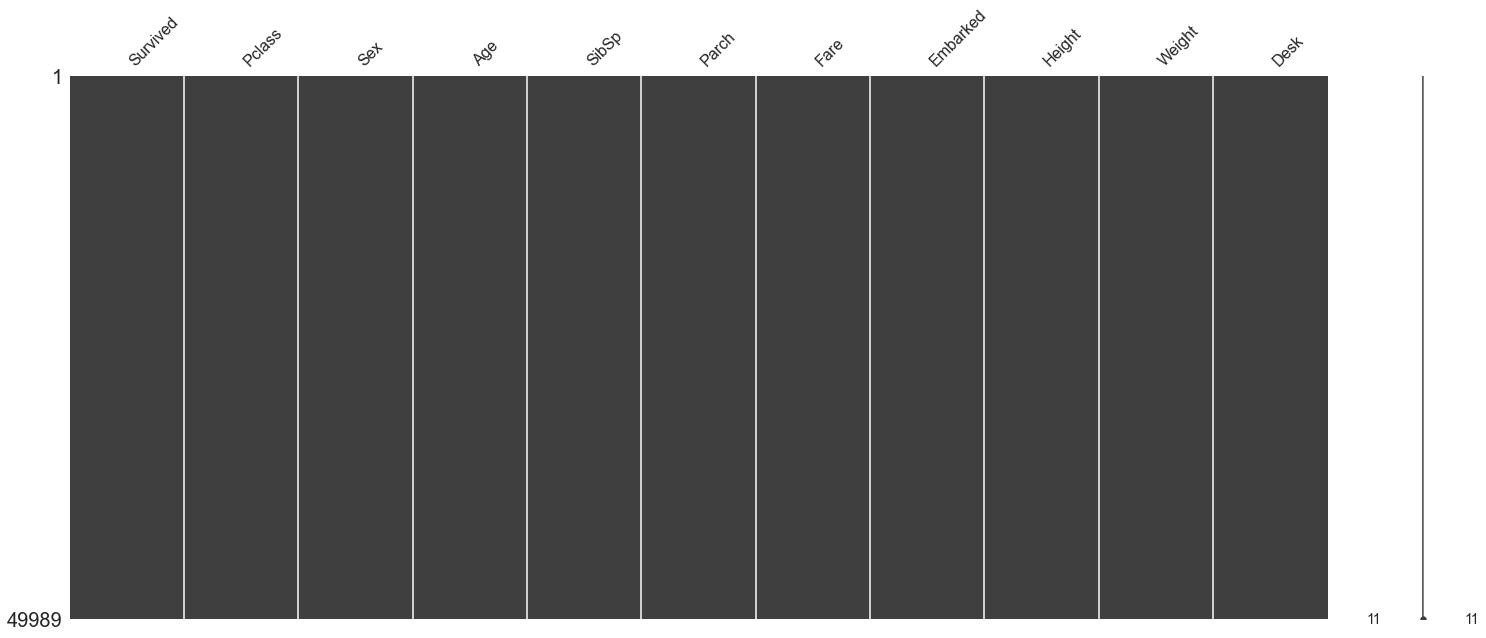

In [1364]:
msno.matrix(df_train)

In [1365]:
X_resampled.shape

(57340, 10)

<AxesSubplot:>

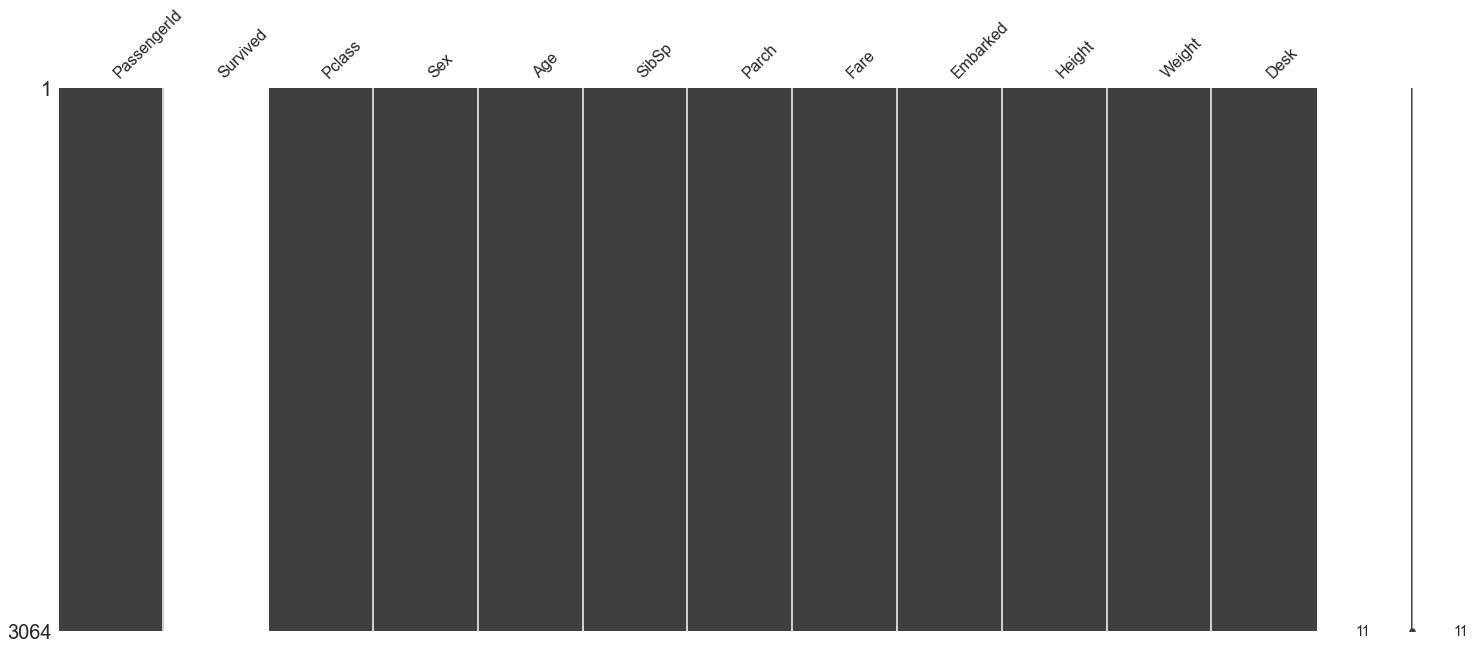

In [1366]:
msno.matrix(df_test)

In [1367]:
'''knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

xgb_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

knn_clf = GridSearchCV(KNeighborsClassifier(), knn_params, cv=2, return_train_score=False)
svc_clf = GridSearchCV(SVC(), svc_params, cv=2, return_train_score=False)
dt_clf = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=2, return_train_score=False)
xgb_clf = GridSearchCV(XGBClassifier(), xgb_params, cv=2, return_train_score=False)
rf_clf = GridSearchCV(RandomForestClassifier(), rf_params, cv=2, return_train_score=False)
lr_clf = GridSearchCV(LogisticRegression(), lr_params, cv=2, return_train_score=False)


svc_clf.fit(X, y)
dt_clf.fit(X, y)
xgb_clf.fit(X, y)
rf_clf.fit(X, y)
lr_clf.fit(X, y)
    
    
print("SVC best parameters:", svc_clf.best_params_)
print("DecisionTreeClassifier best parameters:", dt_clf.best_params_)
print("XGBClassifier best parameters:", xgb_clf.best_params_)
print("RandomForestClassifier best parameters:", rf_clf.best_params_)
print("LogisticRegression best parameters:", lr_clf.best_params_)'''

'knn_params = {\n    \'n_neighbors\': [3, 5, 7],\n    \'weights\': [\'uniform\', \'distance\'],\n    \'algorithm\': [\'auto\', \'ball_tree\', \'kd_tree\', \'brute\']\n}\n\nsvc_params = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'poly\', \'rbf\', \'sigmoid\'],\n    \'gamma\': [\'scale\', \'auto\']\n}\n\ndt_params = {\n    \'criterion\': [\'gini\', \'entropy\'],\n    \'splitter\': [\'best\', \'random\'],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_depth\': [None, 10, 20, 30, 40, 50],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\', None]\n}\n\nxgb_params = {\n    \'n_estimators\': [50, 100, 150, 200],\n    \'max_depth\': [10, 20, 30, 40],\n    \'learning_rate\': [0.1, 0.01, 0.001],\n    \'subsample\': [0.8, 1.0],\n    \'colsample_bytree\': [0.8, 1.0],\n}\n\nrf_params = {\n    \'n_estimators\': [50, 100, 150, 200],\n    \'max_depth\': [10, 20, 30, 40],\n    \'min_samples_split\': [2, 5, 10, 20],\n    \'min_samples_leaf\': [

In [1549]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled[:40000], y_resampled[:40000], test_size=0.2)


{'colsample_bytree': 0.8, 'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1.0}

In [1550]:
results = []
XG = XGBClassifier(colsample_bytree =0.8, learning_rate = 0.001, max_depth =10, n_estimators = 50, subsample = 1.0)
XG.fit(X_train,y_train)
predictions_XGBoost = XG.predict(X_valid)
accuracy_XGBoost = metrics.accuracy_score(y_valid, predictions_XGBoost)
precision_XGBoost = metrics.precision_score(y_valid, predictions_XGBoost)
recall_XGBoost = metrics.recall_score(y_valid, predictions_XGBoost)
results.append({'Model': 'XGBoost', 'Iteration': 2, 'Accuracy': accuracy_XGBoost, 'Precision': precision_XGBoost, 'Recall': recall_XGBoost})

In [1551]:
results

[{'Model': 'XGBoost',
  'Iteration': 2,
  'Accuracy': 0.778,
  'Precision': 0.7502262443438914,
  'Recall': 0.7240174672489083}]

In [1371]:
knn = KNeighborsClassifier(algorithm= 'brute', n_neighbors = 7, weights = 'uniform')
rc = RandomForestClassifier(max_depth= 30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators = 100)
#XG = XGBClassifier(colsample_bytree =1.0, learning_rate = 0.1, max_depth =20, n_estimators = 50, subsample = 0.8)
gbc = GradientBoostingClassifier(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                random_state=42)
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier((XG, rc, knn, gbc),
                                meta_classifier=XG,
                                use_features_in_secondary=True)

In [1372]:
XG = XGBClassifier(colsample_bytree =0.8, learning_rate = 0.001, max_depth =10, n_estimators = 50, subsample = 1.0)
xgboost = XG.fit(X_train,y_train)


In [1373]:
#xgboost = XG.fit(X_train,y_train)
rf = rc.fit(X_train,y_train)

C:\Users\yazan\AppData\Local\Temp\ipykernel_28748\471734642.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rc.fit(X_train,y_train)


In [1374]:
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))

F:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\Conda\lib\site-packages\mlxtend\classifier\stacking_cv_classification.py:290: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


In [1375]:
def blended_predictions(df_test):
    return ((xgboost.predict(df_test)) + \
            (0.rf.predict(df_test)) + \
            (0.4 * stack_gen_model.predict(np.array(df_test)))).mode()[0]

SyntaxError: invalid syntax (3835663086.py, line 3)

In [1433]:
knn_model = knn.fit(X_train,y_train)
gbc_model = gbc.fit(X_train,y_train)

In [1434]:
l = []
l.append(xgboost.predict(X_valid))
l.append(rf.predict(X_valid))
l.append(knn_model.predict(X_valid))
l.append(gbc_model.predict(X_valid))
l.append(stack_gen_model.predict(np.array(X_valid)))
l = pd.DataFrame(l)
l = l.T

In [1377]:
f = l.mode(axis = 1).values

In [1378]:
accuracy_XGBoost = metrics.accuracy_score(y_valid, f)
precision_XGBoost = metrics.precision_score(y_valid, f)
recall_XGBoost = metrics.recall_score(y_valid, f)


In [1380]:
accuracy_XGBoost

0.8014475061039414

In [1382]:
df_test[X_train.columns]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Height,Weight,Desk
0,1.0,0,0.677103,0.0,0.0,-0.217777,0.325023,0.496076,1.510970,0.708798
1,1.0,1,1.232681,1.0,1.0,0.113947,0.325023,-0.139370,0.095381,0.342848
2,1.0,0,0.454871,0.0,0.0,-0.216539,0.720504,0.647161,-0.066703,0.342848
3,1.0,1,1.177124,0.0,0.0,2.511793,0.720504,1.523146,0.947752,0.824926
4,2.0,1,-0.434055,0.0,2.0,1.263840,0.325023,-0.235330,1.527966,0.342848
...,...,...,...,...,...,...,...,...,...,...
3059,2.0,1,1.010450,0.0,0.0,0.413764,0.720504,-0.396976,-2.120927,0.342848
3060,1.0,0,-0.545171,0.0,5.0,0.400286,0.325023,0.316683,-0.011314,0.342848
3061,1.0,1,1.343797,1.0,0.0,3.520580,0.720504,-0.334109,0.633921,0.342848
3062,1.0,0,0.677103,1.0,2.0,-0.311710,0.325023,-0.094460,1.161389,0.342848


In [ ]:
pred = XG.predict(df_test[X_train.columns])

In [1435]:
l = []
l.append(xgboost.predict(df_test[X_train.columns]))
l.append(rf.predict(df_test[X_train.columns]))
l.append(stack_gen_model.predict(np.array(df_test[X_train.columns])))
l.append(knn_model.predict(df_test[X_train.columns]))
l.append(gbc_model.predict(df_test[X_train.columns]))
l = pd.DataFrame(l)
l = l.T

In [1436]:
lista = l.median(axis = 1)
lista

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
3059    1.0
3060    0.0
3061    1.0
3062    0.0
3063    1.0
Length: 3064, dtype: float64

In [1423]:
l.median(axis = 1)

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
3059    1.0
3060    0.0
3061    1.0
3062    0.0
3063    1.0
Length: 3064, dtype: float64

In [1424]:
pred = l.mode(axis = 1).values

In [1392]:
pred = pred.reshape(-1)

In [1442]:
lista = lista.astype('int')

In [1441]:
id = df_test['PassengerId'].astype('int')

In [1438]:
id.dtype

dtype('int32')

In [1443]:
submission = pd.DataFrame({'PassengerId': id, 'Survived': lista}) 

In [1444]:
submission 

,PassengerId,Survived
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1
...,...,...
3059,3060,1
3060,3061,0
3061,3062,1
3062,3063,0


In [1445]:
submission.to_csv('submit.csv',index=False)

In [ ]:
def evaluate_models(X_resampled, y_resampled, num_iterations=10):
    results = []
    for i in range(num_iterations):   d 
        
        X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2)
        
        lr = LogisticRegression(penalty='l1', C= 10, solver = 'liblinear')
        lr.fit(X_train,y_train)
        lr_predictions = lr.predict(X_valid)
        accuracy_lr = metrics.accuracy_score(y_valid, lr_predictions)
        precision_lr = metrics.precision_score(y_valid, lr_predictions)
        recall_lr = metrics.recall_score(y_valid, lr_predictions)
        results.append({'Model': 'Logistic Regression', 'Iteration': i, 'Accuracy': accuracy_lr, 'Precision': precision_lr, 'Recall': recall_lr})
        
        rc = RandomForestClassifier(max_depth= 30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators = 100)
        rc.fit(X_train,y_train)
        predictions_rc = rc.predict(X_valid)
        accuracy_rc = metrics.accuracy_score(y_valid, predictions_rc)
        precision_rc = metrics.precision_score(y_valid, predictions_rc)
        recall_rc = metrics.recall_score(y_valid, predictions_rc)
        results.append({'Model': 'Random Forest', 'Iteration': i, 'Accuracy': accuracy_rc, 'Precision': precision_rc, 'Recall': recall_rc})
        
        XG = XGBClassifier(colsample_bytree =1.0, learning_rate = 0.1, max_depth =20, n_estimators = 50, subsample = 0.8)
        XG.fit(X_train,y_train)
        predictions_XGBoost = XG.predict(X_valid)
        accuracy_XGBoost = metrics.accuracy_score(y_valid, predictions_XGBoost)
        precision_XGBoost = metrics.precision_score(y_valid, predictions_XGBoost)
        recall_XGBoost = metrics.recall_score(y_valid, predictions_XGBoost)
        results.append({'Model': 'XGBoost', 'Iteration': i, 'Accuracy': accuracy_XGBoost, 'Precision': precision_XGBoost, 'Recall': recall_XGBoost})
        
        svm = SVC(C = 10, gamma = 'auto', kernel='rbf')
        svm.fit(X_train, y_train)
        predictions_svm = svm.predict(X_valid)
        accuracy_svm = metrics.accuracy_score(y_valid, predictions_svm)
        precision_svm = metrics.precision_score(y_valid, predictions_svm)
        recall_svm = metrics.recall_score(y_valid, predictions_svm)
        results.append({'Model': 'SVM', 'Iteration': i, 'Accuracy': accuracy_svm, 'Precision': precision_svm, 'Recall': recall_svm})

        
        knn = KNeighborsClassifier(algorithm= 'brute', n_neighbors = 7, weights = 'uniform')
        knn.fit(X_train, y_train)
        predictions_knn = knn.predict(X_valid)
        accuracy_knn = metrics.accuracy_score(y_valid, predictions_knn)
        precision_knn = metrics.precision_score(y_valid, predictions_knn)
        recall_knn = metrics.recall_score(y_valid, predictions_knn)
        results.append({'Model': 'KNN', 'Iteration': i, 'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn})
        
        gbc = GradientBoostingClassifier(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                random_state=42)
        gbc.fit(X_train, y_train)
        predictions_gbc = gbc.predict(X_valid)
        accuracy_gbc = metrics.accuracy_score(y_valid, predictions_gbc)
        precision_gbc = metrics.precision_score(y_valid, predictions_gbc)
        recall_gbc = metrics.recall_score(y_valid, predictions_gbc)
        results.append({'Model': 'GBC', 'Iteration': i, 'Accuracy': accuracy_gbc, 'Precision': precision_gbc, 'Recall': recall_gbc})
    
    return pd.DataFrame(results)

df_results = evaluate_models(X_resampled, y_resampled)
df_results

In [ ]:
df_summary = df_results.pivot_table(index='Model', values=['Accuracy', 'Precision', 'Recall'], aggfunc='mean')
df_summary 